In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [22]:
exec(open("../../header.py").read())

# Import data

In [4]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [20]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

In [7]:
X.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0


In [14]:
print(f"Out of {len(y)} y-values, there are {np.sum(y == 1)[0]} '1s' and {np.sum(y == 0)[0]} '0s'")

Out of 858 y-values, there are 55 '1s' and 803 '0s'


In [63]:
sample_df = X.copy()

In [64]:
sample_df['quantile'] = pd.qcut(sample_df['Age'], q = 10)

In [65]:
sample_df = sample_df\
    .groupby('quantile')\
    .apply(lambda x:x.sample(int(np.ceil(x.shape[0] * 0.1))))\
    .reset_index(drop = True)

In [66]:
sample_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,quantile
0,18.0,2.000000,15.0,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(12.999, 18.0]"
1,17.0,1.000000,14.0,2.275561,0.0,0.0,0.0,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(12.999, 18.0]"
2,17.0,2.527644,15.0,2.000000,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.001328,0.002656,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(12.999, 18.0]"
3,16.0,1.000000,15.0,1.000000,0.0,0.0,0.0,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(12.999, 18.0]"
4,15.0,1.000000,14.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(12.999, 18.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,45.0,1.000000,20.0,5.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,6.140845,5.816901,1.0,0.0,1.0,1.0,"(37.0, 84.0]"
86,44.0,3.000000,23.0,2.275561,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.001328,0.002656,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(37.0, 84.0]"
87,44.0,3.000000,26.0,4.000000,0.0,0.0,0.0,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(37.0, 84.0]"
88,41.0,3.000000,20.0,2.275561,0.0,0.0,0.0,1.000000,8.000000,0.000000,...,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,"(37.0, 84.0]"


In [40]:
print(f"Age: {len(X['Age'].unique())/X.shape[0]:.4f}, Number of sexual partners: {len(X['Number of sexual partners'].unique())/X.shape[0]:.4f}")

Age: 0.0513, Number of sexual partners: 0.0152


In [51]:
sample_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,13.0,1.0,13.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
1,14.0,1.0,14.0,2.275561,0.0,0.0,0.000000,0.641333,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
2,15.0,1.0,15.0,1.000000,0.0,0.0,0.000000,0.641333,2.256419,0.112011,...,0.023904,0.001328,0.002656,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
3,15.0,2.0,14.0,1.000000,0.0,0.0,0.000000,1.000000,0.160000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
4,15.0,3.0,14.0,1.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,52.0,2.0,19.0,5.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
105,59.0,2.0,13.0,2.275561,0.0,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,1.0,0.0,1.0
106,70.0,1.0,16.0,10.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
107,79.0,2.0,16.0,5.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0


# Use class

In [195]:
exec(open("../../header.py").read())

In [196]:
ice = ICE("binary", trace = False)

In [197]:
ice.fit_single_feature(X, rf, "Age")

Fit Age in 2 seconds


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Age ICE Plot'}, xlabel='Age', ylabel='Predicted Probability'>)

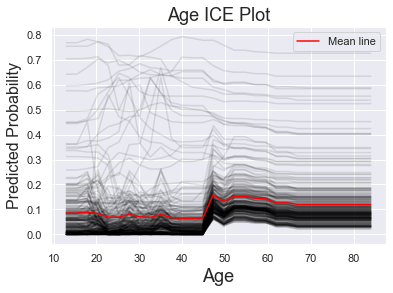

In [198]:
ice.plot_single_feature('Age')

In [199]:
ice.fit(X, rf)

Fit Age in 2 seconds
Fit Number of sexual partners in 2 seconds
Fit First sexual intercourse in 2 seconds
Fit Num of pregnancies in 2 seconds
Fit Smokes in 2 seconds
Fit Smokes (years) in 2 seconds
Fit Smokes (packs/year) in 3 seconds
Fit Hormonal Contraceptives in 2 seconds
Fit Hormonal Contraceptives (years) in 2 seconds
Fit IUD in 2 seconds
Fit IUD (years) in 2 seconds
Fit STDs in 2 seconds
Fit STDs (number) in 2 seconds
Fit STDs:condylomatosis in 2 seconds
Fit STDs:cervical condylomatosis in 2 seconds
Fit STDs:vaginal condylomatosis in 2 seconds
Fit STDs:vulvo-perineal condylomatosis in 2 seconds
Fit STDs:syphilis in 2 seconds
Fit STDs:pelvic inflammatory disease in 2 seconds
Fit STDs:genital herpes in 2 seconds
Fit STDs:molluscum contagiosum in 2 seconds
Fit STDs:AIDS in 2 seconds
Fit STDs:HIV in 2 seconds
Fit STDs:Hepatitis B in 2 seconds
Fit STDs:HPV in 2 seconds
Fit STDs: Number of diagnosis in 2 seconds
Fit STDs: Time since first diagnosis in 2 seconds
Fit STDs: Time since las

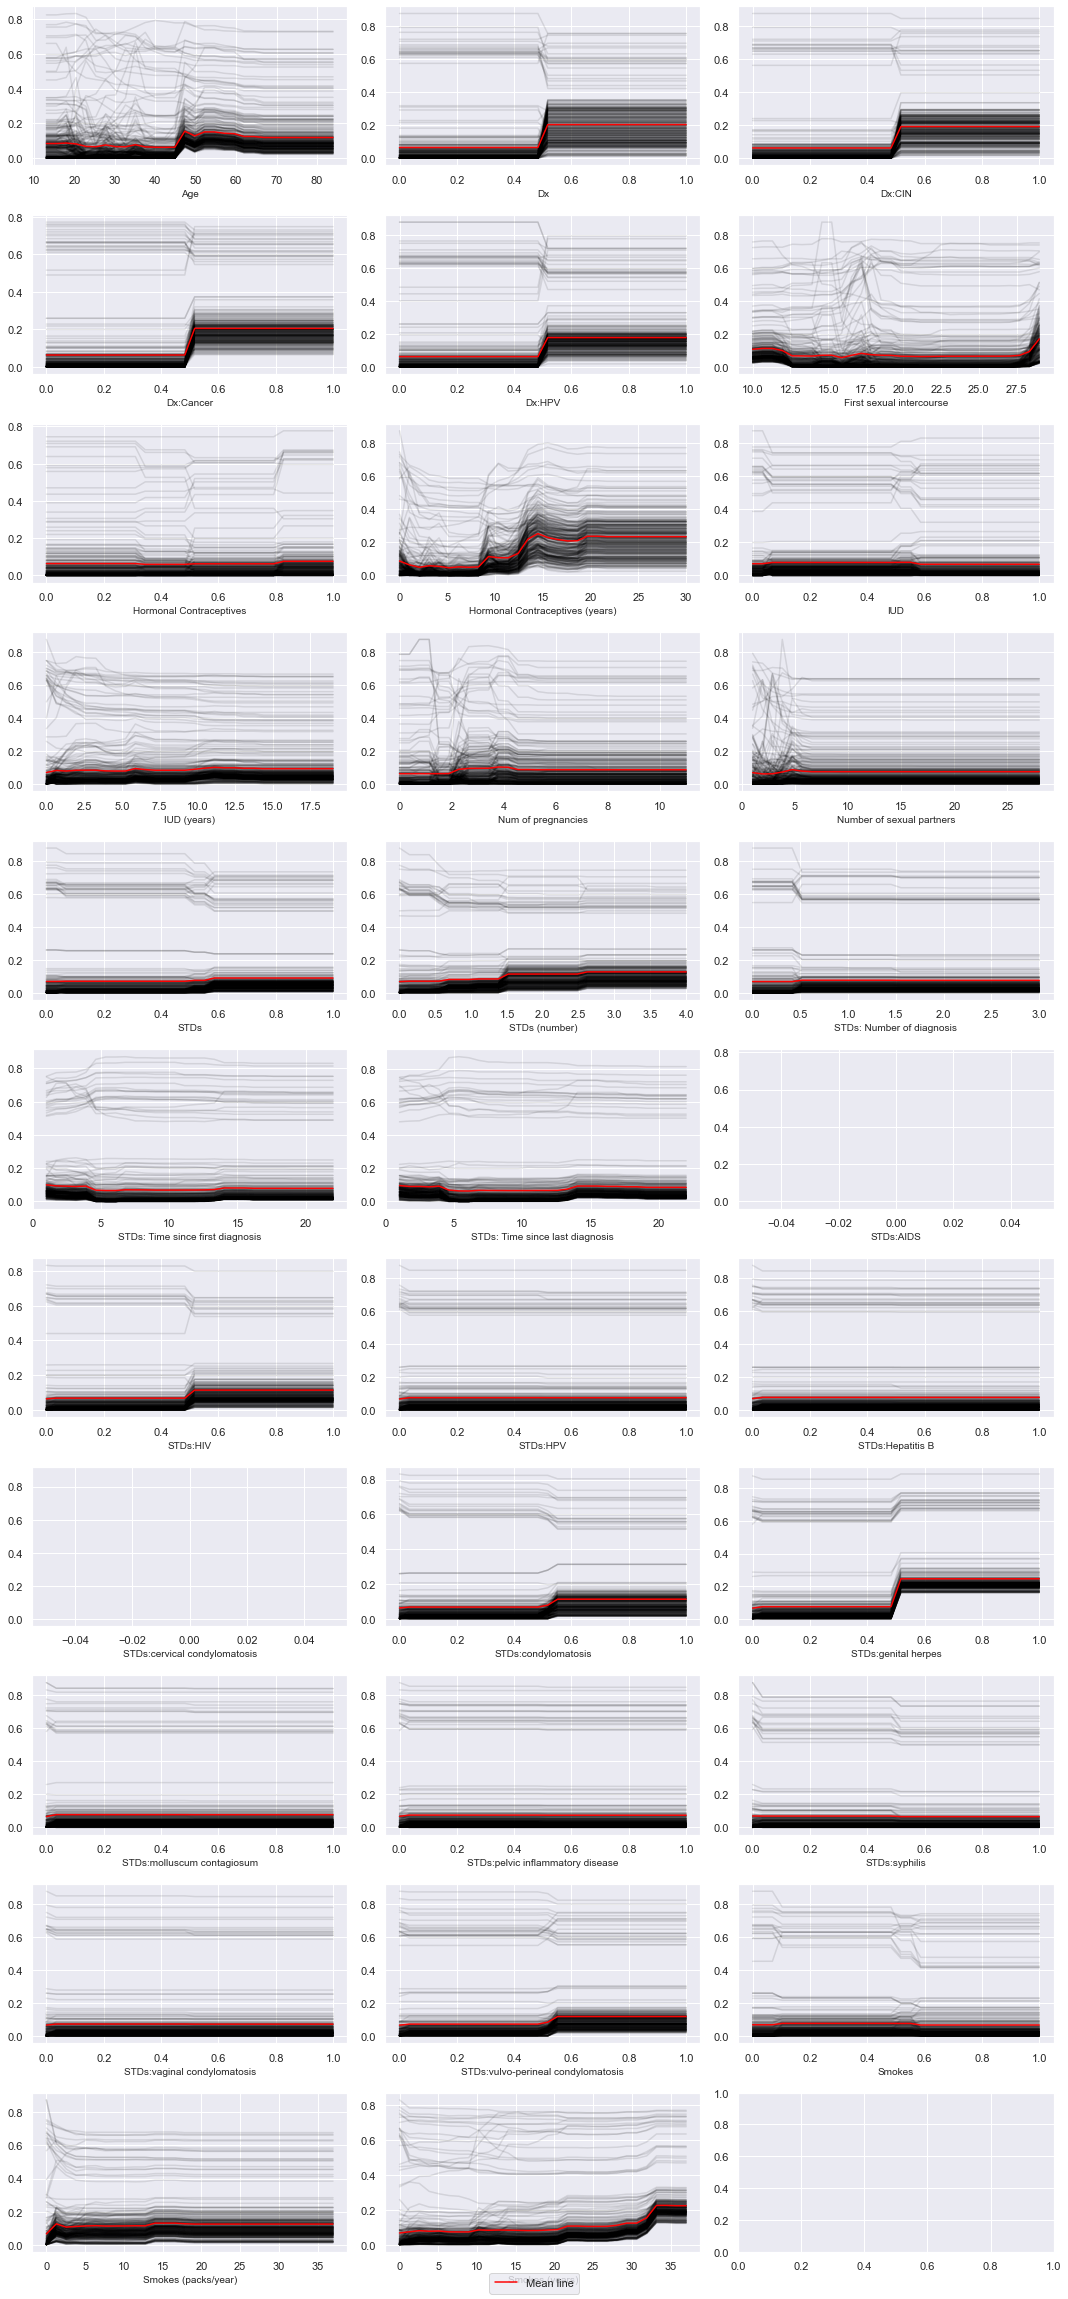

In [200]:
ice.plot(results_root("ice-plot-from-class/all_plots.pdf"))